# **0.0 - Importar Bibliotecas**

In [4]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics as mt
from sklearn.linear_model import Lasso

In [5]:
warnings.filterwarnings("ignore")


def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mt.mean_squared_error(y_true, y_pred))

# **1.0 - Baixar Datasets**

In [6]:
# Train Dataset
X_train = pd.read_csv("/content/X_training.csv")
y_train = pd.read_csv("/content/y_training.csv")

# Validation Dataset
X_val = pd.read_csv("/content/X_validation.csv")
y_val = pd.read_csv("/content/y_validation.csv")

# Test Dataset
X_test = pd.read_csv("/content/X_test.csv")
y_test = pd.read_csv("/content/y_test.csv")

In [7]:
y_train = y_train.iloc[:, 0]
y_val = y_val.iloc[:, 0]
y_test = y_test.iloc[:, 0]

# **2.0 - Performance do Dataset de Treino**

In [8]:
# Train and Fit Model
lasso = Lasso(random_state=42)
lasso.fit(X_train, y_train)

# Predict
y_pred_train = lasso.predict(X_train)

# Performance Metrics
r2_train = mt.r2_score(y_train, y_pred_train)
mse_train = mt.mean_squared_error(y_train, y_pred_train)
rmse_train = root_mean_squared_error(y_train, y_pred_train)
mae_train = mt.mean_absolute_error(y_train, y_pred_train)
mape_train = mt.mean_absolute_percentage_error(y_train, y_pred_train)

print(f"Train R2: {r2_train}")
print(f"Train MSE: {mse_train}")
print(f"Train RMSE: {rmse_train}")
print(f"Train MAE: {mae_train}")
print(f"Train MAPE: {mape_train}")

Train R2: 0.0001904656390567805
Train MSE: 0.24551766657549412
Train RMSE: 0.49549739310665813
Train MAE: 0.4910356966295649
Train MAPE: 1105714090183260.2


# **3.0 - Performance do Dataset de Validação**

In [9]:
# Define Model
lasso = Lasso(random_state=42)
lasso.fit(X_train, y_train)

# Predict
y_pred_val = lasso.predict(X_val)

# Performance Metrics
r2_val = mt.r2_score(y_val, y_pred_val)
mse_val = mt.mean_squared_error(y_val, y_pred_val)
rmse_val = root_mean_squared_error(y_val, y_pred_val)
mae_val = mt.mean_absolute_error(y_val, y_pred_val)
mape_val = mt.mean_absolute_percentage_error(y_val, y_pred_val)

print(f"Validation R2: {r2_val}")
print(f"Validation MSE: {mse_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation MAE: {mae_val}")
print(f"Validation MAPE: {mape_val}")

Validation R2: 0.0001794007552982091
Validation MSE: 0.2455176486776659
Validation RMSE: 0.49549737504619124
Validation MAE: 0.4910484712994044
Validation MAPE: 1106002117874051.9


# **4.0 - Ajuste fino de hiperparâmetros**

In [10]:
max_iter = np.arange(400, 2100, 100)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [11]:
for i in max_iter:
    # Define Model
    lasso = Lasso(random_state=42, max_iter=i)
    lasso.fit(X_train, y_train)

    # Predict
    y_pred = lasso.predict(X_val)

    # Performance Metrics
    r2 = mt.r2_score(y_val, y_pred)
    mse = mt.mean_squared_error(y_val, y_pred)
    rmse = root_mean_squared_error(y_val, y_pred)
    mae = mt.mean_absolute_error(y_val, y_pred)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

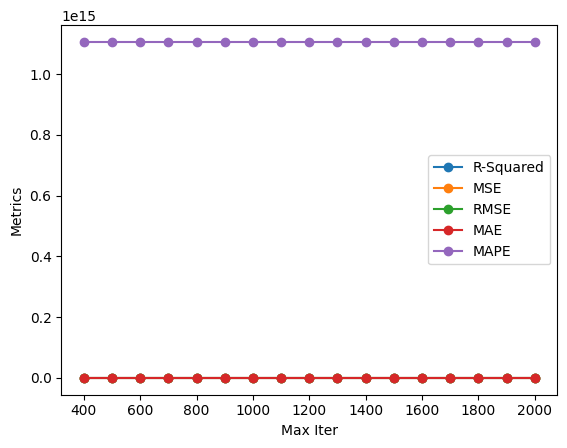

In [12]:
plt.plot(max_iter, r2_list, marker="o", label="R-Squared")
plt.plot(max_iter, mse_list, marker="o", label="MSE")
plt.plot(max_iter, rmse_list, marker="o", label="RMSE")
plt.plot(max_iter, mae_list, marker="o", label="MAE")
plt.plot(max_iter, mape_list, marker="o", label="MAPE")
plt.xlabel("Max Iter")
plt.ylabel("Metrics")
plt.legend()

In [13]:
best_iter = max_iter[np.argmin(rmse_list)]
best_iter

400

In [14]:
alpha = np.arange(0, 5, 0.2)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [15]:
for i in alpha:
    # Define Model
    lasso = Lasso(random_state=42, max_iter=best_iter, alpha=i)
    lasso.fit(X_train, y_train)

    # Predict
    y_pred = lasso.predict(X_val)

    # Performance Metrics
    r2 = mt.r2_score(y_val, y_pred)
    mse = mt.mean_squared_error(y_val, y_pred)
    rmse = root_mean_squared_error(y_val, y_pred)
    mae = mt.mean_absolute_error(y_val, y_pred)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

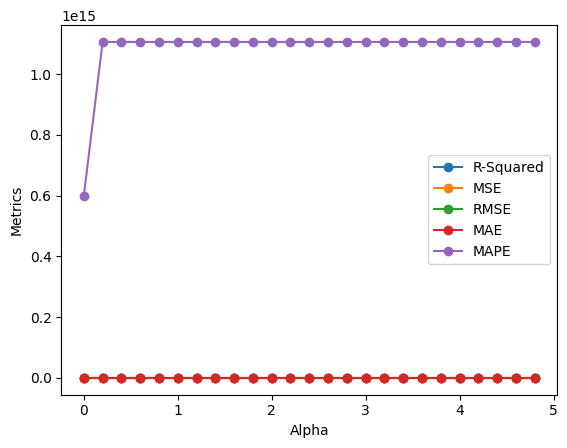

In [16]:
plt.plot(alpha, r2_list, marker="o", label="R-Squared")
plt.plot(alpha, mse_list, marker="o", label="MSE")
plt.plot(alpha, rmse_list, marker="o", label="RMSE")
plt.plot(alpha, mae_list, marker="o", label="MAE")
plt.plot(alpha, mape_list, marker="o", label="MAPE")
plt.xlabel("Alpha")
plt.ylabel("Metrics")
plt.legend()

In [17]:
best_alpha = alpha[np.argmin(rmse_list)]
best_alpha

0.0

# **5.0 - Performance do Dataset de Teste**

In [18]:
# Define Model
lasso = Lasso(random_state=42, max_iter=best_iter, alpha=best_alpha)
lasso.fit(pd.concat([X_train, X_val], axis=0), pd.concat([y_train, y_val], axis=0))

# Predict
y_pred_test = lasso.predict(X_test)

# Performance Metrics
r2_test = mt.r2_score(y_test, y_pred_test)
mse_test = mt.mean_squared_error(y_test, y_pred_test)
rmse_test = root_mean_squared_error(y_test, y_pred_test)
mae_test = mt.mean_absolute_error(y_test, y_pred_test)
mape_test = mt.mean_absolute_percentage_error(y_test, y_pred_test)

print(f"Test R2: {r2_test}")
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test MAPE: {mape_test}")

Test R2: 0.5495195462190989
Test MSE: 0.1109395705519215
Test RMSE: 0.33307592310451006
Test MAE: 0.2499695395500698
Test MAPE: 595271467459799.6


# **6.0 - Salvar Resultados**

In [19]:
train_metrics = {
    "Algorithm": "Linear Regression - Lasso",
    "R-Squared": np.round(r2_train, 3),
    "MSE": np.round(mse_train, 3),
    "RMSE": np.round(rmse_train, 3),
    "MAE": np.round(mae_train, 3),
    "MAPE": np.round(mape_train, 3),
}
validation_metrics = {
    "Algorithm": "Linear Regression - Lasso",
    "R-Squared": np.round(r2_val, 3),
    "MSE": np.round(mse_val, 3),
    "RMSE": np.round(rmse_val, 3),
    "MAE": np.round(mae_val, 3),
    "MAPE": np.round(mape_val, 3),
}
test_metrics = {
    "Algorithm": "Linear Regression - Lasso",
    "R-Squared": np.round(r2_test, 3),
    "MSE": np.round(mse_test, 3),
    "RMSE": np.round(rmse_test, 3),
    "MAE": np.round(mae_test, 3),
    "MAPE": np.round(mape_test, 3),
}

pd.DataFrame(train_metrics, index=[0]).to_csv(
    "./reg_train_metrics.csv", mode="a", header=False
)
pd.DataFrame(validation_metrics, index=[0]).to_csv(
    "./reg_validation_metrics.csv", mode="a", header=False
)
pd.DataFrame(test_metrics, index=[0]).to_csv(
    "./reg_test_metrics.csv", mode="a", header=False
)